(365, 5)


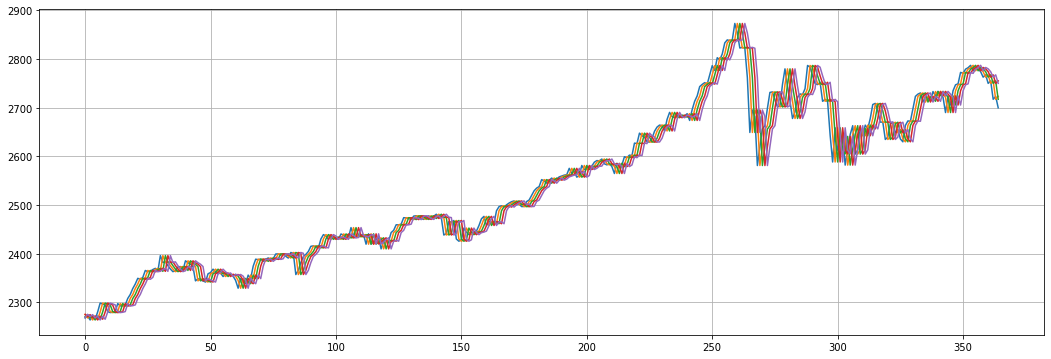

In [1]:
from io import StringIO
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Datos cargados desde drive
orig_url='https://drive.google.com/file/d/1lPNRzlmfm0iT-HV8mLCIdzvt3zNpu5nN/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
sp500 = pd.read_csv(csv_raw)

# Señal deseada
d = sp500.close.iloc[-366:-1].to_numpy().reshape(-1,1)
# Señal de entrada
u1 = sp500.close.iloc[-367:-2].to_numpy().reshape(-1,1)
u2 = sp500.close.iloc[-368:-3].to_numpy().reshape(-1,1)
u3 = sp500.close.iloc[-369:-4].to_numpy().reshape(-1,1)
u4 = sp500.close.iloc[-370:-5].to_numpy().reshape(-1,1)
u5 = sp500.close.iloc[-371:-6].to_numpy().reshape(-1,1)
u = np.concatenate((u1,u2,u3,u4,u5), axis=1)
# Grafica de la entrada
plt.figure(figsize=(18, 6))
print(u.shape)
plt.plot(u)
plt.grid()
plt.show()

In [0]:
from KAF import QKLMS

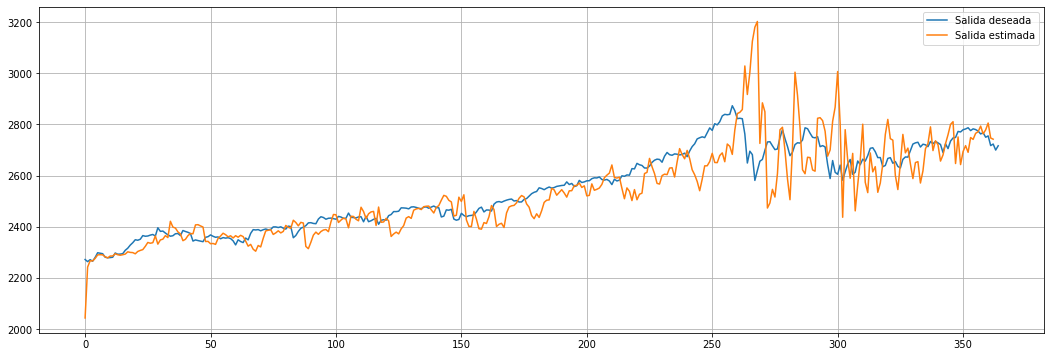

In [3]:
qklms = QKLMS()
y = qklms.evaluate(u,d)
plt.figure(figsize=(18, 6))
plt.grid()
plt.plot(d, label="Salida deseada")
plt.plot(y[:-2], label="Salida estimada")
plt.legend()